<a href="https://colab.research.google.com/github/kodenshacho/ColaboratoryNotes/blob/main/curve_fitting_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np

# データの生成
np.random.seed(42)
data = np.concatenate([np.random.normal(3, 1, size=50),
                       np.random.normal(5, 1, size=50),
                       np.random.normal(8, 1, size=50)])

In [ ]:

from sklearn.mixture import GaussianMixture

# 混合ガウスモデルを作成
model = GaussianMixture(n_components=10)

# データをフィッティング
model.fit(data.reshape(-1, 1))

# パラメータを取得
mu = model.means_.flatten()
sigma = np.sqrt(model.covariances_.flatten())
weights = model.weights_

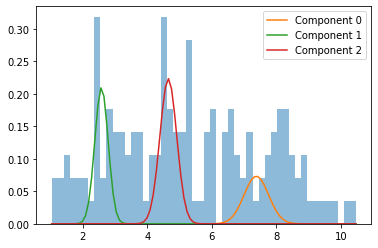

In [ ]:

import matplotlib.pyplot as plt

# ヒストグラムを表示
plt.hist(data, bins=50, density=True, alpha=0.5)

# 混合ガウスモデルを表示
x = np.linspace(data.min(), data.max(), 100)
for i in range(3):
    plt.plot(x, weights[i] * np.exp(-(x - mu[i]) ** 2 / (2 * sigma[i] ** 2)) / (np.sqrt(2 * np.pi) * sigma[i]), label=f"Component {i}")

plt.legend()
plt.show()

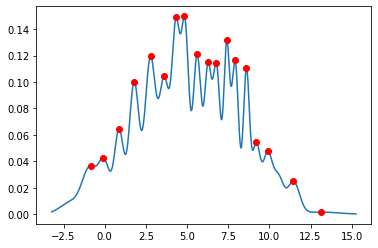

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.signal import argrelmax

# 生成するデータ数
num_points = 200

# ピークの数
num_peaks = 20

# 分布の数
num_distributions = 10

# 分布の平均値
means = np.random.uniform(low=0, high=10, size=num_peaks)

# 分布の標準偏差
std = np.random.uniform(low=0.5, high=2, size=num_peaks)

# 分布の比重
weights = np.random.dirichlet(np.ones(num_peaks), size=num_distributions)

# サンプルデータを生成
X = []
for i in range(num_distributions):
    for j in range(num_peaks):
        X.extend(np.random.normal(loc=means[j], scale=std[j], size=int(weights[i, j] * num_points)))
X = np.array(X).reshape(-1, 1)

# 混合ガウスモデルを生成
model = GaussianMixture(n_components=num_peaks, covariance_type='full')

# フィッティングを行う
model.fit(X)

# プロット用にデータを生成
x = np.linspace(X.min(), X.max(), 1000)
y = np.exp(model.score_samples(x.reshape(-1, 1)))

# ピークを検出する
peaks = argrelmax(y, order=5)

# プロットを行う
plt.plot(x, y)
plt.plot(x[peaks], y[peaks], 'ro')
plt.show()

In [ ]:

from scipy.special import wofz

# Define the Voigt function
def voigt(x, amplitude, mean, sigma_g, sigma_l):
    return (amplitude / (sigma_l * np.sqrt(2 * np.pi))) * np.real(wofz(((x - mean) + 1j * sigma_g) / sigma_l / np.sqrt(2)))

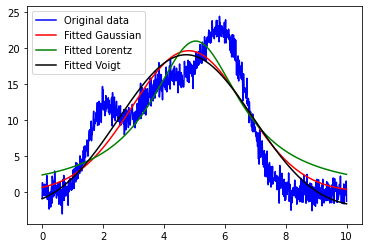

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate fake energy-dispersion spectroscopy data
energies = np.linspace(0, 10, 1000)
intensities = np.zeros_like(energies)

# Define the parameters for three peaks
peak1 = {'amplitude': 10, 'mean': 2, 'sigma': 0.5}
peak2 = {'amplitude': 15, 'mean': 4, 'sigma': 1}
peak3 = {'amplitude': 20, 'mean': 6, 'sigma': 0.75}

# Add the peaks to the fake data
intensities += peak1['amplitude'] * np.exp(-((energies - peak1['mean'])**2) / (2 * peak1['sigma']**2))
intensities += peak2['amplitude'] * np.exp(-((energies - peak2['mean'])**2) / (2 * peak2['sigma']**2))
intensities += peak3['amplitude'] * np.exp(-((energies - peak3['mean'])**2) / (2 * peak3['sigma']**2))

# Add some noise to the data
intensities += np.random.normal(0, 1, len(intensities))

# Find the distribution of element multiple peaks
peaks = []
for i in range(1, len(intensities) - 1):
    if intensities[i-1] < intensities[i] and intensities[i] > intensities[i+1]:
        peaks.append(energies[i])

# Define the Gaussian, Lorentz, and Voigt functions
def gaussian(x, amplitude, mean, sigma):
    return amplitude * np.exp(-((x - mean)**2) / (2 * sigma**2))

def lorentz(x, amplitude, mean, sigma):
    return amplitude / (1 + ((x - mean) / sigma)**2)

def voigt(x, amplitude, mean, sigma_g, sigma_l):
    return (amplitude / (sigma_l * np.sqrt(2 * np.pi))) * np.real(wofz(((x - mean) + 1j * sigma_g) / sigma_l / np.sqrt(2)))

# Initialize the parameters for curve fitting
param_initial_g = [10, 2, 0.5]
param_initial_l = [10, 2, 0.5]
param_initial_v = [10, 2, 0.5, 0.5]

# Perform curve fitting using the Gaussian function
params_opt_g, params_cov_g = curve_fit(gaussian, energies, intensities, p0=param_initial_g)

# Perform curve fitting using the Lorentz function
params_opt_l, params_cov_l = curve_fit(lorentz, energies, intensities, p0=param_initial_l)

# Perform curve fitting using the Voigt function
params_opt_v, params_cov_v = curve_fit(voigt, energies, intensities, p0=param_initial_v)

# Generate the fitted curves
energies_fine = np.linspace(0, 10, 10000)
fitted_gaussian = gaussian(energies_fine, *params_opt_g)
fitted_lorentz = lorentz(energies_fine, *params_opt_l)
fitted_voigt = voigt(energies_fine, *params_opt_v)

# Plot the original data and the fitted curves
plt.plot(energies, intensities, 'b', label='Original data')
plt.plot(energies_fine, fitted_gaussian, 'r', label='Fitted Gaussian')
plt.plot(energies_fine, fitted_lorentz, 'g', label='Fitted Lorentz')
plt.plot(energies_fine, fitted_voigt, 'k', label='Fitted Voigt')
plt.legend()
plt.show()

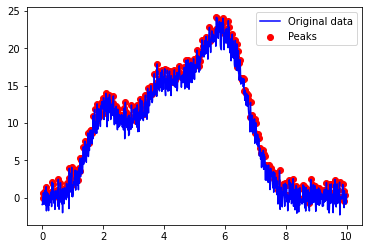

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmax

# Generate fake energy-dispersion spectroscopy data
energies = np.linspace(0, 10, 1000)
intensities = np.zeros_like(energies)

# Define the parameters for three peaks
peak1 = {'amplitude': 10, 'mean': 2, 'sigma': 0.5}
peak2 = {'amplitude': 15, 'mean': 4, 'sigma': 1}
peak3 = {'amplitude': 20, 'mean': 6, 'sigma': 0.75}

# Add the peaks to the fake data
intensities += peak1['amplitude'] * np.exp(-((energies - peak1['mean'])**2) / (2 * peak1['sigma']**2))
intensities += peak2['amplitude'] * np.exp(-((energies - peak2['mean'])**2) / (2 * peak2['sigma']**2))
intensities += peak3['amplitude'] * np.exp(-((energies - peak3['mean'])**2) / (2 * peak3['sigma']**2))

# Add some noise to the data
intensities += np.random.normal(0, 1, len(intensities))

# Find the indices of the local maxima in the data
peaks_indices = argrelmax(intensities)[0]

# Extract the peak energies and intensities from the data
peaks_energies = energies[peaks_indices]
peaks_intensities = intensities[peaks_indices]

# Plot the original data and the peaks
plt.plot(energies, intensities, 'b', label='Original data')
plt.scatter(peaks_energies, peaks_intensities, c='r', label='Peaks')
plt.legend()
plt.show()


混合ガウスモデルを使用したカーブフィッティングを行うには、まずデータセットを用意する必要があります。次に、混合ガウスモデルを定義し、最小二乗法を使用して、データセットをフィットさせることができます。


次のようなサンプルコードを作成することができます。このコードでは、NumPyライブラリを使用して、データセットを生成し、scikit-learnライブラリを使用して、混合ガウスモデルをフィットさせることができます。

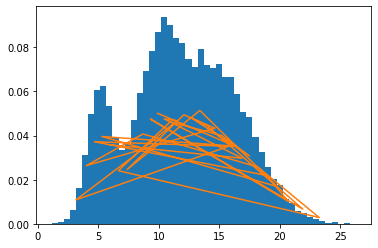

In [10]:

import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.signal import argrelmax

# データセットを生成する
np.random.seed(40)
data = np.concatenate([np.random.normal(5, 1, 3000),
                       np.random.normal(10, 2, 7000),
                       np.random.normal(15, 3, 10000)])

# 混合ガウスモデルを定義する
gmm = GaussianMixture(n_components=30)

# データセットをフィットさせる
gmm.fit(data[:, np.newaxis])

# ピークを求める
peaks = argrelmax(gmm.means_, order=50)[0]

# カーブをプロットする
import matplotlib.pyplot as plt
plt.hist(data, bins=50, density=True)
plt.plot(gmm.means_, gmm.weights_ / gmm.weights_.sum())
plt.show()

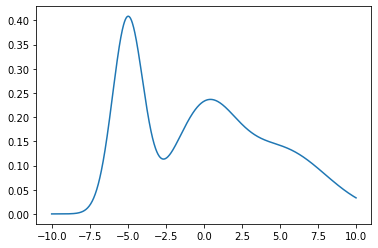

In [11]:

import numpy as np
import matplotlib.pyplot as plt

# 複数のガウス分布のパラメータを定義
mu = [-5, 0, 5]
sigma = [1, 2, 3]

# 複数のガウス分布を生成
x = np.linspace(-10, 10, 1000)
y = np.zeros_like(x)
for m, s in zip(mu, sigma):
    y += 1 / (s * np.sqrt(2 * np.pi)) * np.exp(- (x - m)**2 / (2 * s**2))

# 生成した分布をプロット
plt.plot(x, y)
plt.show()

In [ ]:

ガウスモデル: ガウス分布を用いて、スペクトルを表すモデルです。エネルギー分散が小さい場合によく使われます。

ローレンツモデル: ローレンツ分布を用いて、スペクトルを表すモデルです。エネルギー分散が大きい場合によく使われます。

混合ガウスモデル: 複数のガウス分布を用いて、スペクトルを表すモデルです。複数の独立したエネルギー分散を含むスペクトルを表す場合によく使われます。

フォークトモデル: フォークト分布を用いて、スペクトルを表すモデルです。エネルギー分散が小さい場合によく使われます。特に、単一の粒子や振動子のエネルギー分散を分析する場合によく使われま